In [2]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')

In [4]:
X = wine.drop('quality' , 1).values #excluding quality column 
qua = wine['quality'].values #only the values of quality column
qua2 = qua <=5 # bad ones to boolean
qua2 = qua2.astype(int) #boolean dataframe casted to integer for plotting it properly

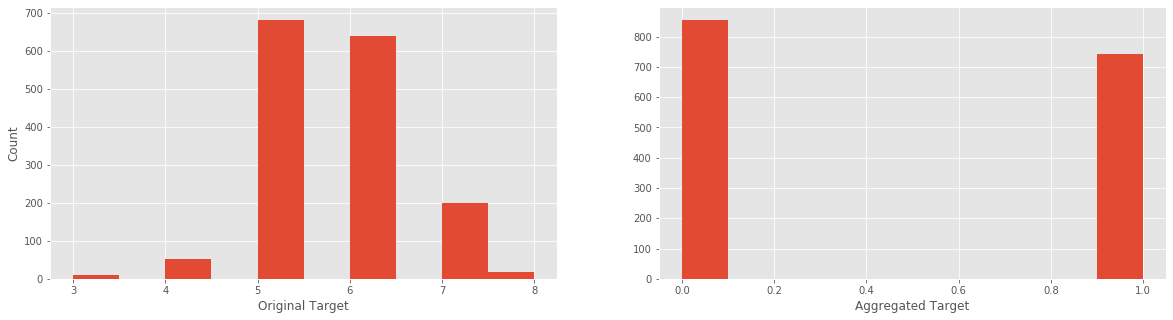

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5));
plt.subplot(1,2,1);
plt.hist(qua);
plt.xlabel('Original Target')
plt.ylabel('Count')
plt.subplot(1,2,2);
plt.hist(qua2)
plt.xlabel('Aggregated Target') #seperated as good and bad
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, qua2, test_size=0.2, random_state=42) #splitting the data 

In [9]:
accscr = np.empty((30))
kvalues = np.empty((30))
for K in range(30):
    K_value = K + 1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights = 'uniform', algorithm = 'auto')
    model = neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    accscr[K] = accuracy_score(y_test,y_pred)*100
    kvalues[K] = K+1
    print("Accuracy is ", accscr[K], "% for K-value:" , K_value)
print('k-NN accuracy for test set: %f' % model.score(x_test, y_test))

Accuracy is  64.0625 % for K-value: 1
Accuracy is  65.625 % for K-value: 2
Accuracy is  62.18749999999999 % for K-value: 3
Accuracy is  62.81250000000001 % for K-value: 4
Accuracy is  61.25000000000001 % for K-value: 5
Accuracy is  60.9375 % for K-value: 6
Accuracy is  60.3125 % for K-value: 7
Accuracy is  62.5 % for K-value: 8
Accuracy is  62.81250000000001 % for K-value: 9
Accuracy is  62.5 % for K-value: 10
Accuracy is  63.74999999999999 % for K-value: 11
Accuracy is  63.125 % for K-value: 12
Accuracy is  62.18749999999999 % for K-value: 13
Accuracy is  64.0625 % for K-value: 14
Accuracy is  63.125 % for K-value: 15
Accuracy is  64.0625 % for K-value: 16
Accuracy is  64.6875 % for K-value: 17
Accuracy is  64.375 % for K-value: 18
Accuracy is  65.0 % for K-value: 19
Accuracy is  65.0 % for K-value: 20
Accuracy is  64.375 % for K-value: 21
Accuracy is  63.74999999999999 % for K-value: 22
Accuracy is  64.6875 % for K-value: 23
Accuracy is  65.0 % for K-value: 24
Accuracy is  64.375 % f

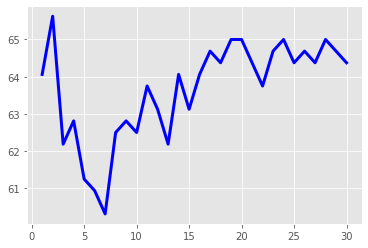

In [10]:
plt.plot(kvalues,accscr,color='blue',linewidth=3)
plt.show()

In [14]:
neigh = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', algorithm = 'auto')
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[110  69]
 [ 58  83]]


In [12]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, model.predict(x_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       179
           1       0.60      0.57      0.59       141

    accuracy                           0.64       320
   macro avg       0.64      0.64      0.64       320
weighted avg       0.64      0.64      0.64       320



In [17]:
from sklearn.preprocessing import scale
xs = scale(X) #scaling done
xs_train, xs_test, y_train, y_test = train_test_split(xs, qua2, test_size=0.2, random_state=42)
model2 = neigh.fit(xs_train, y_train) #scaled ones model is named model2
print('k-NN score for test set: %f' % model2.score(xs_test, y_test))
print('k-NN score for training set: %f' % model2.score(xs_train, y_train))
y_true, y_pred = y_test, model2.predict(xs_test)
print(classification_report(y_true, y_pred)) #new model's accuracy can be seen and compared with above results

k-NN score for test set: 0.731250
k-NN score for training set: 0.744332
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       179
           1       0.69      0.71      0.70       141

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



In [18]:
accscr2 = np.empty((30))
kvalues2 = np.empty((30))
for K in range(30):
    K_value = K + 1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights = 'uniform', algorithm = 'auto')
    model = neigh.fit(xs_train,y_train)
    y_pred = neigh.predict(xs_test)
    accscr2[K] = accuracy_score(y_test,y_pred)*100
    kvalues2[K] = K+1
    print("Accuracy is ", accscr2[K], "% for K-value:" , K_value)
print('k-NN accuracy for test set: %f' % model.score(xs_test, y_test)) 

Accuracy is  75.625 % for K-value: 1
Accuracy is  71.875 % for K-value: 2
Accuracy is  70.625 % for K-value: 3
Accuracy is  69.6875 % for K-value: 4
Accuracy is  71.25 % for K-value: 5
Accuracy is  71.5625 % for K-value: 6
Accuracy is  70.0 % for K-value: 7
Accuracy is  70.0 % for K-value: 8
Accuracy is  71.25 % for K-value: 9
Accuracy is  72.5 % for K-value: 10
Accuracy is  71.875 % for K-value: 11
Accuracy is  71.5625 % for K-value: 12
Accuracy is  70.9375 % for K-value: 13
Accuracy is  70.625 % for K-value: 14
Accuracy is  72.5 % for K-value: 15
Accuracy is  71.25 % for K-value: 16
Accuracy is  72.1875 % for K-value: 17
Accuracy is  71.25 % for K-value: 18
Accuracy is  69.375 % for K-value: 19
Accuracy is  71.5625 % for K-value: 20
Accuracy is  71.5625 % for K-value: 21
Accuracy is  70.9375 % for K-value: 22
Accuracy is  71.25 % for K-value: 23
Accuracy is  72.1875 % for K-value: 24
Accuracy is  71.875 % for K-value: 25
Accuracy is  71.5625 % for K-value: 26
Accuracy is  71.5625 % f

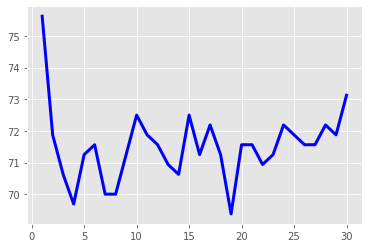

In [19]:
plt.plot(kvalues2,accscr2,color='blue',linewidth=3)
plt.show()